# TASK 1

## Part 1
First, let's import all necessary libraries.

In [1]:
import numpy as np # math
import pandas as pd # dataframes
import matplotlib.pyplot as plt # drawing
from sklearn.preprocessing import StandardScaler # scaling data
import seaborn as sns # visualization
import random # for random sampling
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold # splitting cross-validation
from sklearn.metrics import mean_squared_error # mean_squarred_log_error can't be used during training as dataset will contain negative values
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

Next, let's import the data and explore it a bit.

In [2]:
train = pd.read_csv('train.csv', sep = ',', header = 0) # import train data
test = pd.read_csv('test.csv', sep = ',', header = 0) # import test data
sample_submission = pd.read_csv('sample_submission.csv', sep = ',', header = 0) # import test data

In [3]:
train.head() # look at train header

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train = train.drop('Id', axis = 1)
test = test.drop('Id', axis = 1)

There are 79 columns we need to work on (Id obviously is not a feature, as it is just index, and SalePrice is the value we have to predict.<br>
Let's explore each one individually so that the data will be in correct form. Also, when modifying data in train columns, the same will be done to the columns in test. Categorical data is modyfied with min max, numerical - with log1p.

In [5]:
columns = train.columns[:79] # subset of columns to look at
i = 0 #column counter

Looking at:  MSSubClass
Unique values in train:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 
Unique values in test:  [ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150]


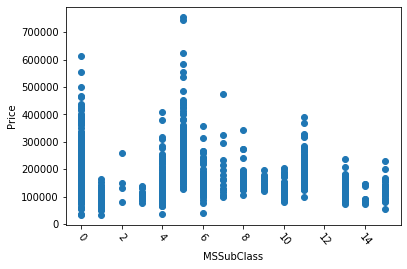

In [6]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# No nan values here, but test contains values not met on train, the data is categorical. Not good. For convenience, let's modify it a bit
keys = sorted(test[columns[i]].unique())
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  MSZoning
Unique values in train:  ['RL' 'RM' 'C (all)' 'FV' 'RH'] 
Unique values in test:  ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]


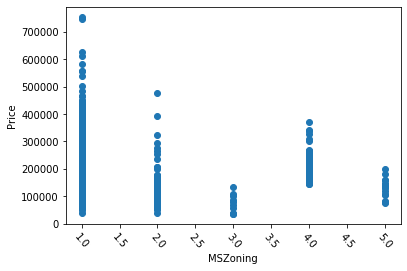

In [7]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Nan met at test. Let's fill nan with 0, everything else with numbers.
test[columns[i]] = test[columns[i]].fillna('0')
keys = train[columns[i]].unique()
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  LotFrontage
Unique values in train:  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] 
Unique values in test:  [ 80.  81.  74.  78.  43.  75.  nan  63.  85.  70.  26.  21.  24. 102.
  94.  90.  79. 110. 105.  41. 100.  67.  60.  73.  92.  84.  39.  88.
  25.  30.  57.  68.  98. 120.  87. 119.  65.  56.  69.  50.  53.  52.
  51.  72.  86. 124.  44.  83.  64.  82.  38.  89.  35.  58.  66.  93.
  31.  76.  28.  61.  95. 129.  59.  77.  96.  47.  34. 117.  48.  62.
  42. 

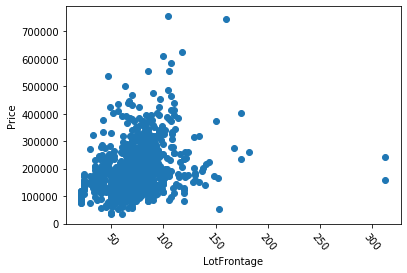

In [8]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
#This is not categorical (based on column description), so let's just fill nan values with mean of train.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  LotArea
Unique values in train:  [ 8450  9600 11250 ... 17217 13175  9717] 
Unique values in test:  [11622 14267 13830 ...  1894 20000 10441]


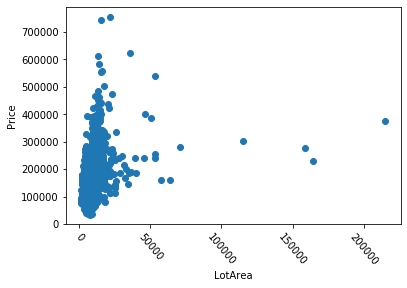

In [9]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# The data also is not categorical, not known if any nan is there, so let's just fill it with mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  Street
Unique values in train:  ['Pave' 'Grvl'] 
Unique values in test:  ['Pave' 'Grvl']


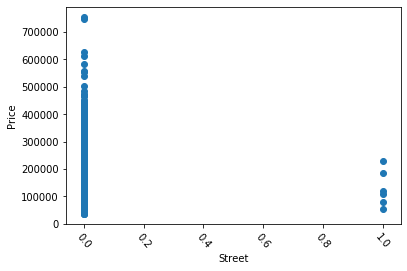

In [10]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data, no nan, so filling it with 0 and 1.
test[columns[i]] = test[columns[i]].apply(lambda x: 0 if x == 'Pave' else 1)
train[columns[i]] = train[columns[i]].apply(lambda x: 0 if x == 'Pave' else 1)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Alley
Unique values in train:  [nan 'Grvl' 'Pave'] 
Unique values in test:  [nan 'Pave' 'Grvl']


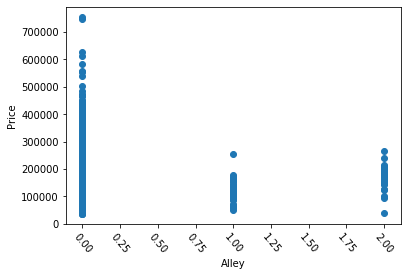

In [11]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nan. Let's fill nan with 0, everything else with 1 or 2 correspondingly.
category = {'Grvl': 1, 'Pave': 2}
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  LotShape
Unique values in train:  ['Reg' 'IR1' 'IR2' 'IR3'] 
Unique values in test:  ['Reg' 'IR1' 'IR2' 'IR3']


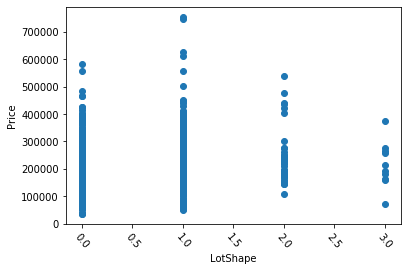

In [12]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data, no nan values. Just replacing everything with numbers.
keys = test[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  LandContour
Unique values in train:  ['Lvl' 'Bnk' 'Low' 'HLS'] 
Unique values in test:  ['Lvl' 'HLS' 'Bnk' 'Low']


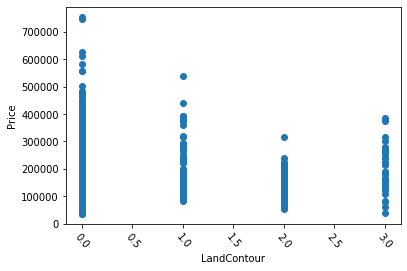

In [13]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data, no nan values. Just replacing everything with numbers.
keys = test[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Utilities
Unique values in train:  ['AllPub' 'NoSeWa'] 
Unique values in test:  ['AllPub' nan]


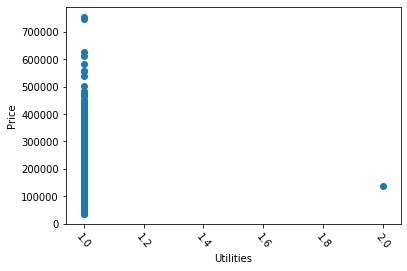

In [14]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Nan in test, so replacing nan with 0, everything else with numbers.
category = {'AllPub': 1, 'NoSeWa': 2}
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  LotConfig
Unique values in train:  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 
Unique values in test:  ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']


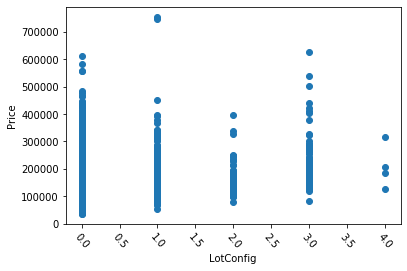

In [15]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = test[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  LandSlope
Unique values in train:  ['Gtl' 'Mod' 'Sev'] 
Unique values in test:  ['Gtl' 'Mod' 'Sev']


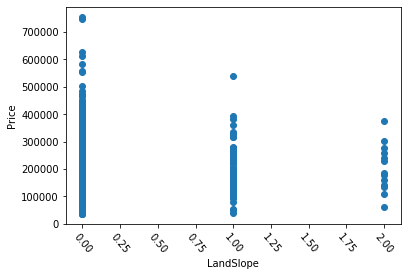

In [16]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = test[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Neighborhood
Unique values in train:  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 
Unique values in test:  ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']


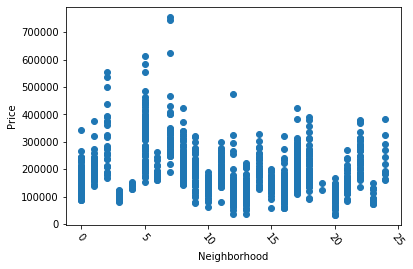

In [17]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = test[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Condition1
Unique values in train:  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 
Unique values in test:  ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']


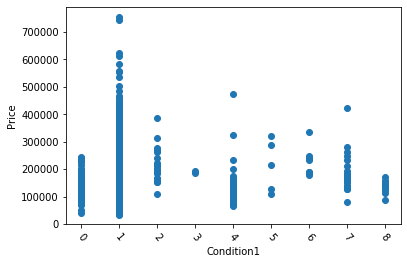

In [18]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = test[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Condition2
Unique values in train:  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 
Unique values in test:  ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']


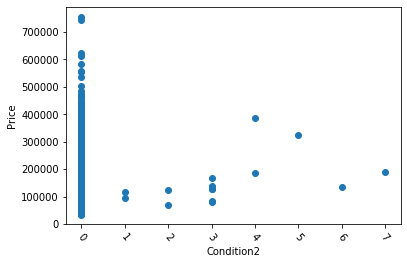

In [19]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans. Train contains more values.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  BldgType
Unique values in train:  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 
Unique values in test:  ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']


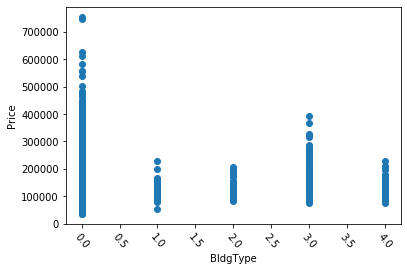

In [20]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  HouseStyle
Unique values in train:  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 
Unique values in test:  ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']


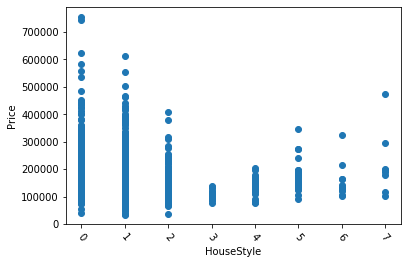

In [21]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans. Train contains more values.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  OverallQual
Unique values in train:  [ 7  6  8  5  9  4 10  3  1  2] 
Unique values in test:  [ 5  6  8  7  4  9  2  3 10  1]


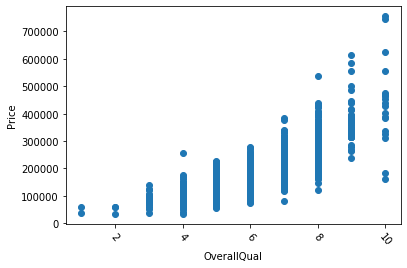

In [22]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data already in numbers. Perfect.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  OverallCond
Unique values in train:  [5 8 6 7 4 2 3 9 1] 
Unique values in test:  [6 5 7 8 2 9 3 4 1]


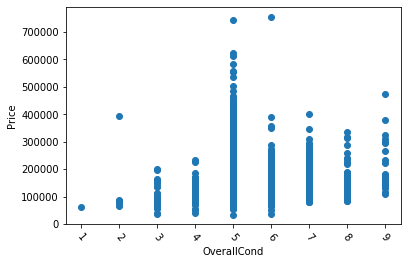

In [23]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data already in numbers. Perfect.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  YearBuilt
Unique values in train:  [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 
Unique values in test:  [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 1960 1963 1900 1957 1938 1923 1890 1910 1922 1950
 1925 1939 1940 1942 1936 1930 1915 1912 1917 1907 1968 1977 1927 1947
 1954 1987 1996 1972 1945 1924 1931 1941 1994 1989 1921 1896 1976 2008
 19

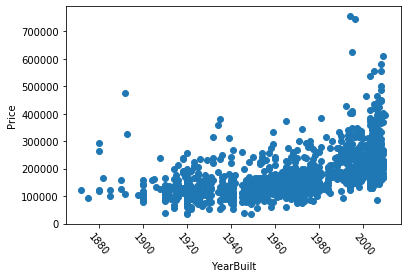

In [24]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Non-categorical data with no nans. Great!
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  YearRemodAdd
Unique values in train:  [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 
Unique values in test:  [1961 1958 1998 1992 1994 2007 1990 1970 1999 1971 1975 2010 2005 2006
 2004 2002 1950 1993 2000 2003 1967 1978 1966 1964 2001 2008 2009 1959
 1956 1952 1955 1960 1984 1954 1957 1962 1997 1980 1968 1987 1979 1996
 1972 1985 1991 1989 1977 1976 1973 1986 1969 1995 1974 1981 1965 1951
 1953 1963 1982 1988 1983]


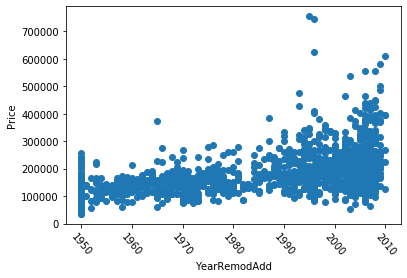

In [25]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Non-categorical data with no nans. Great!
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  RoofStyle
Unique values in train:  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 
Unique values in test:  ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']


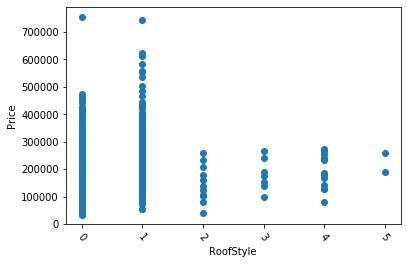

In [26]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  RoofMatl
Unique values in train:  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 
Unique values in test:  ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']


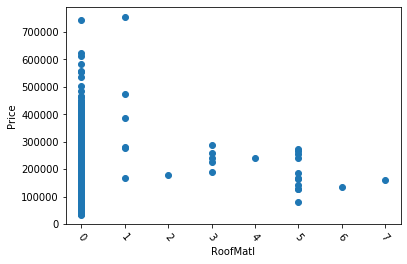

In [27]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans. Train contains more values.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Exterior1st
Unique values in train:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 
Unique values in test:  ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']


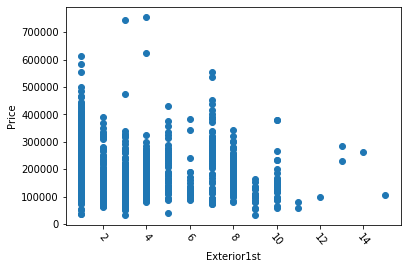

In [28]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans. Train contains more values. Test contains nan (fill it with 0).
test[columns[i]] = test[columns[i]].fillna('0')
keys = train[columns[i]].unique()
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Exterior2nd
Unique values in train:  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock'] 
Unique values in test:  ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']


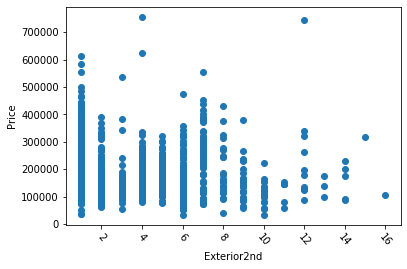

In [29]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans. Train contains more values. Test contains nan (fill it with 0).
test[columns[i]] = test[columns[i]].fillna('0')
keys = train[columns[i]].unique()
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  MasVnrType
Unique values in train:  ['BrkFace' 'None' 'Stone' 'BrkCmn' nan] 
Unique values in test:  ['None' 'BrkFace' 'Stone' 'BrkCmn' nan]


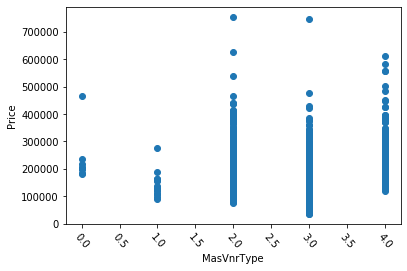

In [30]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  MasVnrArea
Unique values in train:  [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+

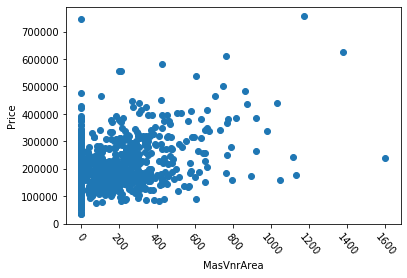

In [31]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with nan. Let's just fill nan with mean of train.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  ExterQual
Unique values in train:  ['Gd' 'TA' 'Ex' 'Fa'] 
Unique values in test:  ['TA' 'Gd' 'Ex' 'Fa']


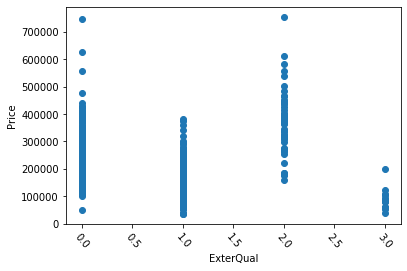

In [32]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  ExterCond
Unique values in train:  ['TA' 'Gd' 'Fa' 'Po' 'Ex'] 
Unique values in test:  ['TA' 'Gd' 'Fa' 'Po' 'Ex']


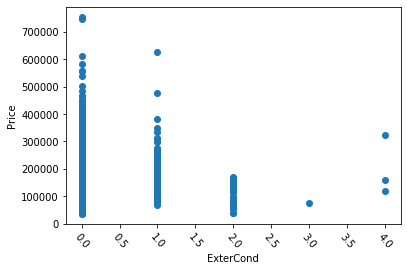

In [33]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Foundation
Unique values in train:  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone'] 
Unique values in test:  ['CBlock' 'PConc' 'BrkTil' 'Stone' 'Slab' 'Wood']


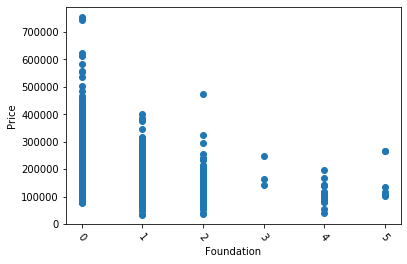

In [34]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  BsmtQual
Unique values in train:  ['Gd' 'TA' 'Ex' nan 'Fa'] 
Unique values in test:  ['TA' 'Gd' 'Ex' 'Fa' nan]


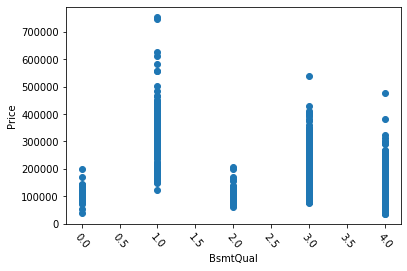

In [35]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  BsmtCond
Unique values in train:  ['TA' 'Gd' nan 'Fa' 'Po'] 
Unique values in test:  ['TA' 'Po' 'Fa' 'Gd' nan]


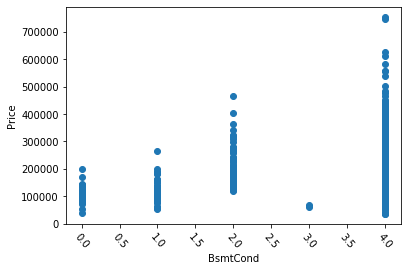

In [36]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  BsmtExposure
Unique values in train:  ['No' 'Gd' 'Mn' 'Av' nan] 
Unique values in test:  ['No' 'Gd' 'Mn' 'Av' nan]


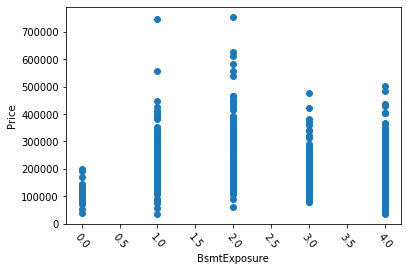

In [37]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  BsmtFinType1
Unique values in train:  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'] 
Unique values in test:  ['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]


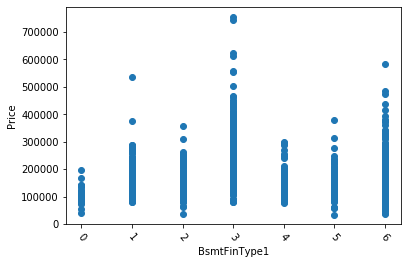

In [38]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  BsmtFinSF1
Unique values in train:  [ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840  188  234 1218 1277 1018 1153 1213  731  643  967
  747  280  179  456 1351   24  763  182  104 1810  384  490  649  632
  941  739  912 1013  603 1880  565  320  462  228  336  448 1201   33
  588  600  713 1046  648  310 1162  520  108  569 1200  224  705  444
  250  984   35  774  419  170 1470  938  570  300  120  116  512  567
  445  695  405 1005  668  821  432 1300  507  679 1332  209  680  716
 1400  416  429  222   57  660 1016  370  351  379 1288  360  639  495
  288 1398  477  831 1904  436  352  611 1086  297  626  560  390  566
 1126 1036 1088  641  617  662  312 1065  787  468   36  822  378  946
  341   16  550  524   56  321  842  689  625  358  402   94 1078  329
  929  697 1573  270  922  503 1334  361  672  506  714  403  751  226
  620  546  392  421  905  904  430  614  450  210  292  795 1285  819
  420  841  281  894 1464  7

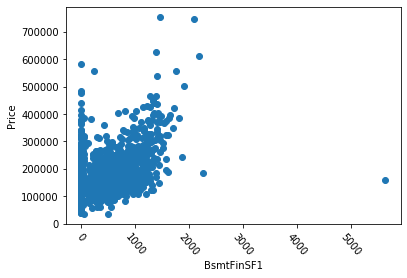

In [39]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  BsmtFinType2
Unique values in train:  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ'] 
Unique values in test:  ['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]


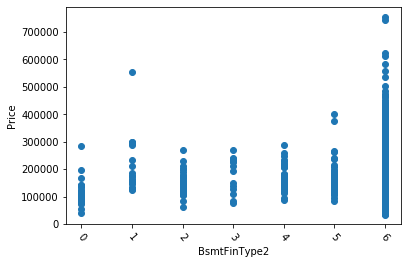

In [40]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  BsmtFinSF2
Unique values in train:  [   0   32  668  486   93  491  506  712  362   41  169  869  150  670
   28 1080  181  768  215  374  208  441  184  279  306  180  580  690
  692  228  125 1063  620  175  820 1474  264  479  147  232  380  544
  294  258  121  391  531  344  539  713  210  311 1120  165  532   96
  495  174 1127  139  202  645  123  551  219  606  612  480  182  132
  336  468  287   35  499  723  119   40  117  239   80  472   64 1057
  127  630  128  377  764  345 1085  435  823  500  290  324  634  411
  841 1061  466  396  354  149  193  273  465  400  682  557  230  106
  791  240  547  469  177  108  600  492  211  168 1031  438  375  144
   81  906  608  276  661   68  173  972  105  420  546  334  352  872
  110  627  163 1029] 
Unique values in test:  [ 144.    0.   78.  859.  981.   42.   46.  162.  174.  350.  263. 1073.
   12.  159.  474.  453.  684.  387.  688.  252.  590.  284.  276.  168.
  294.  622.  113. 1526.  360.  774.  364.  596.

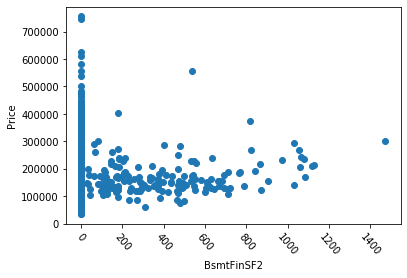

In [41]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  BsmtUnfSF
Unique values in train:  [ 150  284  434  540  490   64  317  216  952  140  134  177  175 1494
  520  832  426    0  468  525 1158  637 1777  200  204 1566  180  486
  207  649 1228 1234  380  408 1117 1097   84  326  445  383  167  465
 1296   83 1632  736  192  612  816   32  935  321  860 1410  148  217
  530 1346  576  318 1143 1035  440  747  701  343  280  404  840  724
  295 1768  448   36 1530 1065  384 1288  684 1013  402  635  163  168
  176  370  350  381  410  741 1226 1053  641  516  793 1139  550  905
  104  310  252 1125  203  728  732  510  899 1362   30  958  556  413
  479  297  658  262  891 1304  519 1907  336  107  432  403  811  396
  970  506  884  400  896  253  409   93 1200  572  774  769 1335  340
  882  779  112  470  294 1686  360  441  354  700  725  320  554  312
  968  504 1107  577  660   99  871  474  289  600  755  625 1121  276
  186 1424 1140  375   92  305 1176   78  274  311  710  686  457 1232
 1498 1010  160 2336  630  63

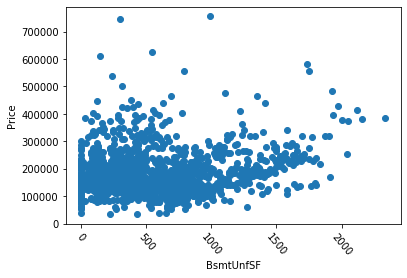

In [42]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  TotalBsmtSF
Unique values in train:  [ 856 1262  920  756 1145  796 1686 1107  952  991 1040 1175  912 1494
 1253  832 1004    0 1114 1029 1158  637 1777 1060 1566  900 1704 1484
  520  649 1228 1234 1398 1561 1117 1097 1297 1057 1088 1350  840  938
 1150 1752 1434 1656  736  955  794  816 1842  384 1425  970  860 1410
  780  530 1370  576 1143 1947 1453  747 1304 2223  845 1086  462  672
 1768  440  896 1237 1563 1065 1288  684  612 1013  990 1235  876 1214
  824  680 1588  960  458  950 1610  741 1226 1053  641  789  793 1844
  994 1264 1809 1028  729 1092 1125 1673  728  732 1080 1199 1362 1078
  660 1008  924  992 1063 1267 1461 1907  928  864 1734  910 1490 1728
  715  884  969 1710  825 1602 1200  572  774 1392 1232 1572 1541  882
 1149  644 1617 1582  720 1064 1606 1202 1151 1052 2216  968  504 1188
 1593  853  725 1431  855 1726 1360  755 1713 1121 1196  617  848 1424
 1140 1100 1157 1212  689 1070 1436  686  798 1248 1498 1010  713 2392
  630 1203  483 1373 1194 1

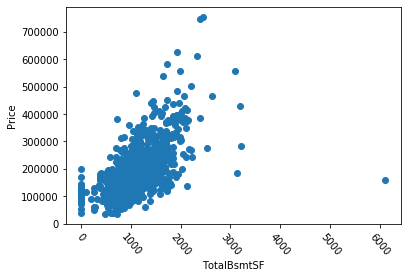

In [43]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  Heating
Unique values in train:  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor'] 
Unique values in test:  ['GasA' 'GasW' 'Grav' 'Wall']


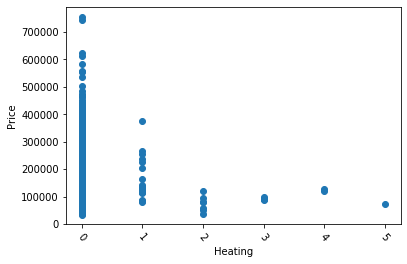

In [44]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  HeatingQC
Unique values in train:  ['Ex' 'Gd' 'TA' 'Fa' 'Po'] 
Unique values in test:  ['TA' 'Gd' 'Ex' 'Fa' 'Po']


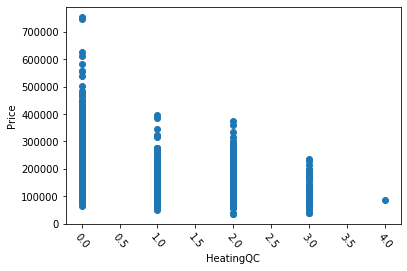

In [45]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  CentralAir
Unique values in train:  ['Y' 'N'] 
Unique values in test:  ['Y' 'N']


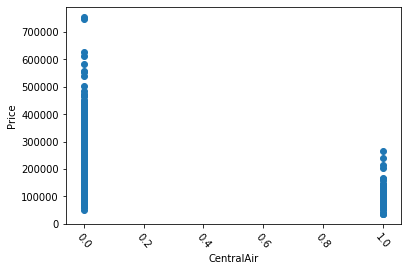

In [46]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Electrical
Unique values in train:  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan] 
Unique values in test:  ['SBrkr' 'FuseA' 'FuseF' 'FuseP']


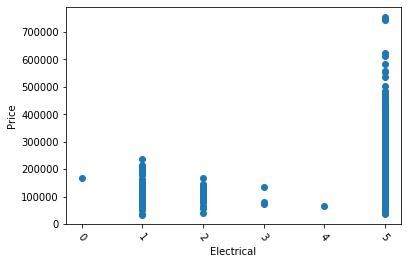

In [47]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans in train.
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  1stFlrSF
Unique values in train:  [ 856 1262  920  961 1145  796 1694 1107 1022 1077 1040 1182  912 1494
 1253  854 1004 1296 1114 1339 1158 1108 1795 1060 1600  900 1704  520
  649 1228 1234 1700 1561 1132 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 1518 1656  736  955  794  816 1842 1360 1425  983  860 1426
  780  581 1370  902 1143 2207 1479  747 1304 2223  845  885 1086  840
  526  952 1072 1768  682 1337 1563 1065  804 1301  684  612 1013  990
 1235  964 1260  905  680 1588  960  835 1225 1610  977 1535 1226 1053
 1047  789  997 1844 1216  774 1282 2259 1436  729 1092 1125 1699  728
  988  772 1080 1199 1586  958  660 1327 1721 1682 1214 1959  928  864
 1734  910 1501 1728  970  875  896  969 1710 1252 1200  572  991 1392
 1232 1572 1541  882 1149  808 1867 1707 1064 1362 1651 2158 1164 2234
  968  769  901 1340  936 1217 1224 1593 1549  725 1431  855 1726  929
 1713 1121 1279  865  848  720 1442 1696 1100 1180 1212  932  689 1236
  810 1137 1248 1498 1010  811

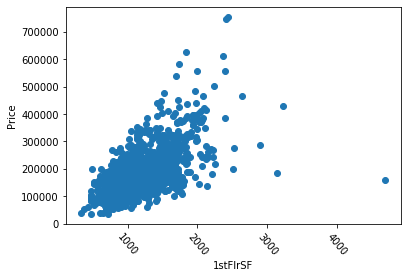

In [48]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  2ndFlrSF
Unique values in train:  [ 854    0  866  756 1053  566  983  752 1142 1218  668 1320  631  716
  676  860 1519  530  808  977 1330  833  765  462  213  548  960  670
 1116  876  612 1031  881  790  755  592  939  520  639  656 1414  884
  729 1523  728  351  688  941 1032  848  836  475  739 1151  448  896
  524 1194  956 1070 1096  467  547  551  880  703  901  720  316 1518
  704 1178  754  601 1360  929  445  564  882  920  518  817 1257  741
  672 1306  504 1304 1100  730  689  591  888 1020  828  700  842 1286
  864  829 1092  709  844 1106  596  807  625  649  698  840  780  568
  795  648  975  702 1242 1818 1121  371  804  325  809 1200  871 1274
 1347 1332 1177 1080  695  167  915  576  605  862  495  403  838  517
 1427  784  711  468 1081  886  793  665  858  874  526  590  406 1157
  299  936  438 1098  766 1101 1028 1017 1254  378 1160  682  110  600
  678  834  384  512  930  868  224 1103  560  811  878  574  910  620
  687  546  902 1000  846 1067

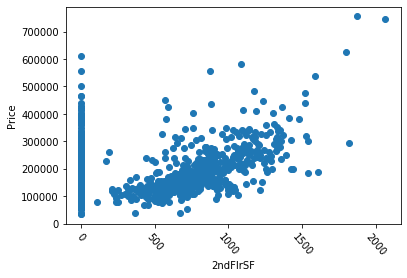

In [49]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with possible nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  LowQualFinSF
Unique values in train:  [  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384] 
Unique values in test:  [   0  362 1064  431  436  259  312  108  697  512  114  205   80  140
  450]


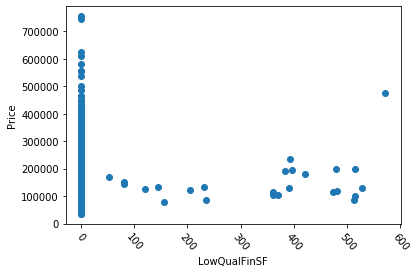

In [50]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with possible nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  GrLivArea
Unique values in train:  [1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 1040 2324  912 1494
 1253  854 1004 1296 1114 1339 2376 1108 1795 1060 1600  900 1704  520
 1317 1228 1234 1700 1561 2452 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 2149 1656 1452  955 1470 1176  816 1842 1360 1425 1739 1720
 2945  780 1158 1111 1370 2034 2473 2207 1479  747 2287 2223  845 1718
 1086 1605  988  952 1285 1768 1230 2142 1337 1563 1065 1474 2417 1560
 1224 1526  990 1235  964 2291 1588  960  835 1225 1610 1732 1535 1226
 1818 1992 1047  789 1517 1844 1855 1430 2696 2259 2320 1458 1092 1125
 3222 1456 1123 1080 1199 1586  754  958  840 1348 1053 2157 2054 1327
 1721 1682 1214 1959 1852 1764  864 1734 1385 1501 1728 1709  875 2035
 1344  969 1993 1252 1200 1096 1968 1947 2462 1232 2668 1541  882 1616
 1355 1867 2161 1707 1382 1767 1651 2158 2060 1920 2234  968 1525 1802
 1340 2082 3608 1217 1593 2727 1431 1726 3112 2229 1713 1121 1279 1310
  848 1284 1442 1696 1100 206

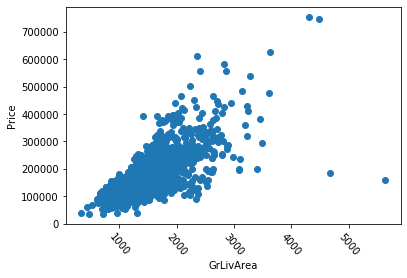

In [51]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with possible nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  BsmtFullBath
Unique values in train:  [1 0 2 3] 
Unique values in test:  [ 0.  1.  2.  3. nan]


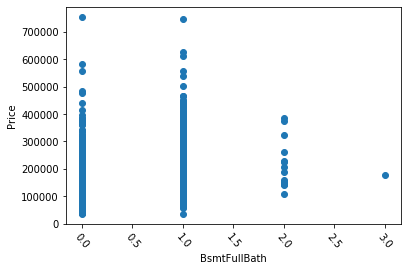

In [52]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Replacing nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  BsmtHalfBath
Unique values in train:  [0 1 2] 
Unique values in test:  [ 0.  1. nan  2.]


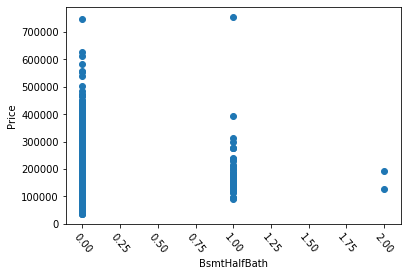

In [53]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Replacing nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  FullBath
Unique values in train:  [2 1 3 0] 
Unique values in test:  [1 2 3 4 0]


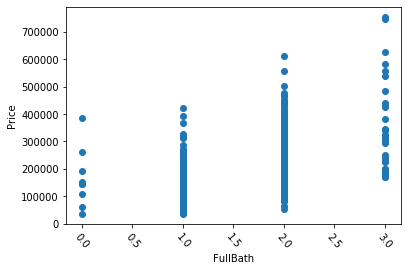

In [54]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data already in numbers. Perfect.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  HalfBath
Unique values in train:  [1 0 2] 
Unique values in test:  [0 1 2]


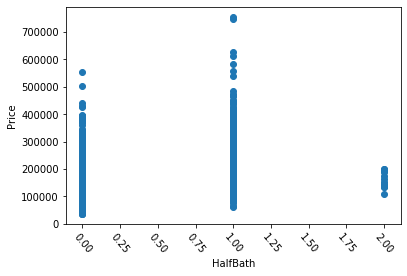

In [55]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data already in numbers. Perfect.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  BedroomAbvGr
Unique values in train:  [3 4 1 2 0 5 6 8] 
Unique values in test:  [2 3 4 1 6 5 0]


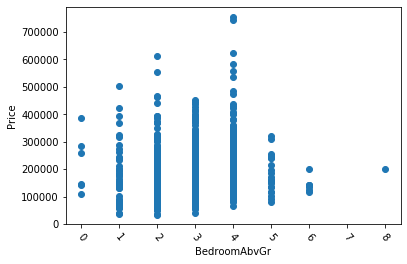

In [56]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data already in numbers. Perfect.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  KitchenAbvGr
Unique values in train:  [1 2 3 0] 
Unique values in test:  [1 2 0]


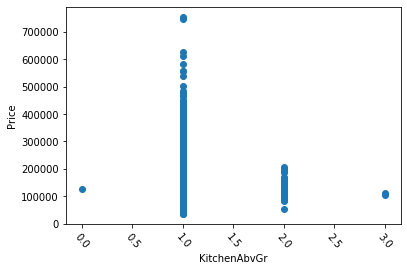

In [57]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data already in numbers. Perfect.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  KitchenQual
Unique values in train:  ['Gd' 'TA' 'Ex' 'Fa'] 
Unique values in test:  ['TA' 'Gd' 'Ex' 'Fa' nan]


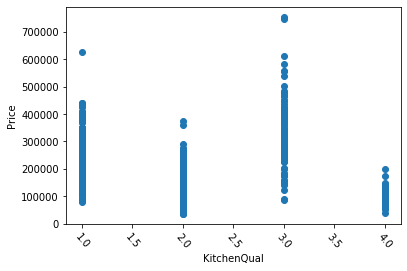

In [58]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans. Test contains nan (fill it with 0).
test[columns[i]] = test[columns[i]].fillna('0')
keys = train[columns[i]].unique()
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  TotRmsAbvGrd
Unique values in train:  [ 8  6  7  9  5 11  4 10 12  3  2 14] 
Unique values in test:  [ 5  6  7  4 10  8  9  3 12 11 13 15]


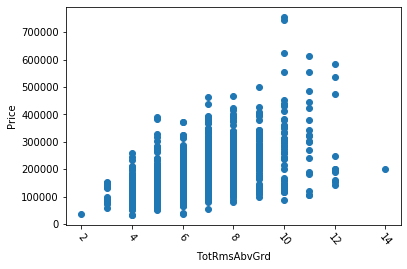

In [59]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data already in numbers. Perfect.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Functional
Unique values in train:  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev'] 
Unique values in test:  ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan]


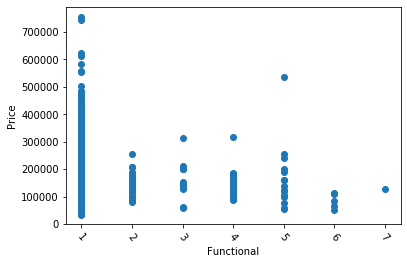

In [60]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans. Test contains nan (fill it with 0).
test[columns[i]] = test[columns[i]].fillna('0')
keys = train[columns[i]].unique()
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Fireplaces
Unique values in train:  [0 1 2 3] 
Unique values in test:  [0 1 2 3 4]


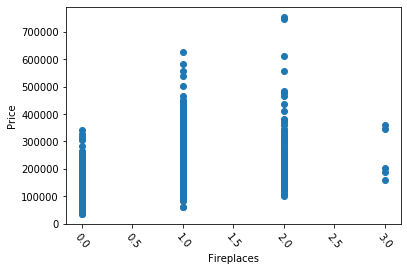

In [61]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data already in numbers. Perfect.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  FireplaceQu
Unique values in train:  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 
Unique values in test:  [nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']


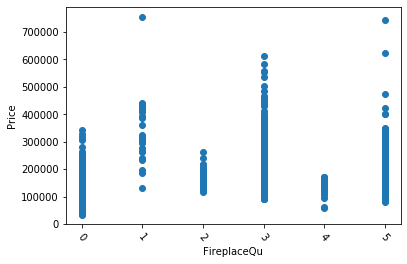

In [62]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  GarageType
Unique values in train:  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'] 
Unique values in test:  ['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']


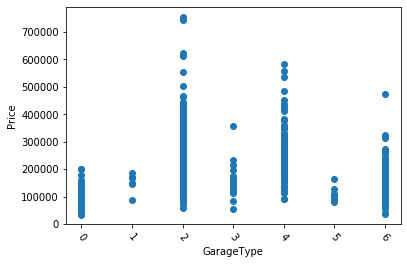

In [63]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  GarageYrBlt
Unique values in train:  [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.] 
Unique values in test:  [1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974. 2000. 2010. 1967. 1978. 1966.
 1964.   nan 1994. 1949. 1959. 1956. 1952. 1955. 1989. 1950. 1960. 1963.
 1900. 1957. 1938. 1948. 1962. 1928. 1930. 1926. 1939. 1973. 1942. 1979.
 1923. 1915. 1917. 1940. 1910. 1969

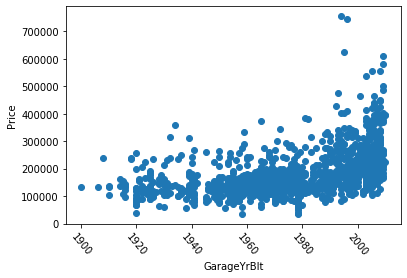

In [64]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with possible nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  GarageFinish
Unique values in train:  ['RFn' 'Unf' 'Fin' nan] 
Unique values in test:  ['Unf' 'Fin' 'RFn' nan]


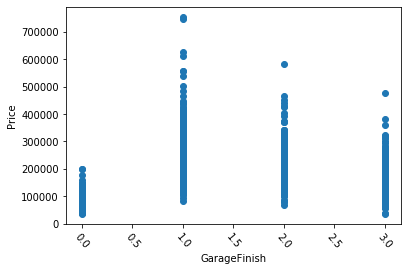

In [65]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  GarageCars
Unique values in train:  [2 3 1 0 4] 
Unique values in test:  [ 1.  2.  3.  0.  4.  5. nan]


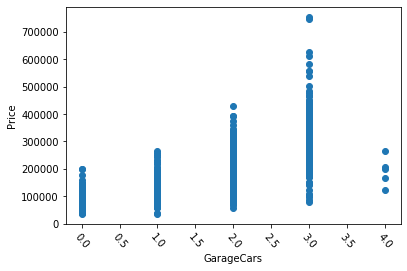

In [66]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Replacing nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  GarageArea
Unique values in train:  [ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843  552  870  888  746  708  513
 1025  656  872  292  441  1

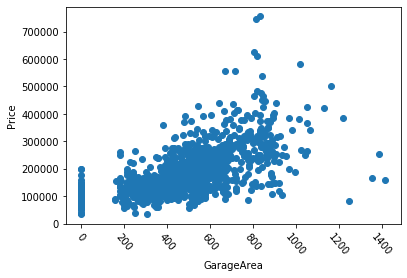

In [67]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with possible nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  GarageQual
Unique values in train:  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po'] 
Unique values in test:  ['TA' nan 'Fa' 'Gd' 'Po']


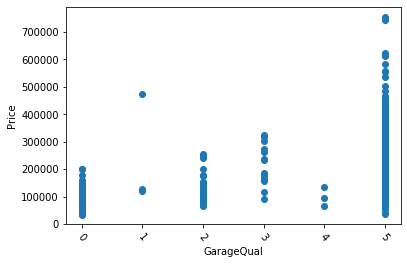

In [68]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  GarageCond
Unique values in train:  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex'] 
Unique values in test:  ['TA' nan 'Fa' 'Gd' 'Po' 'Ex']


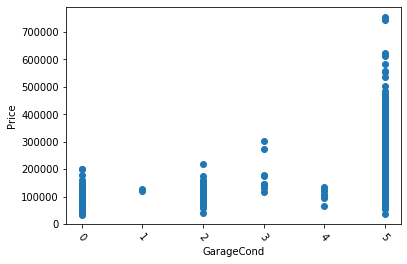

In [69]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  PavedDrive
Unique values in train:  ['Y' 'N' 'P'] 
Unique values in test:  ['Y' 'N' 'P']


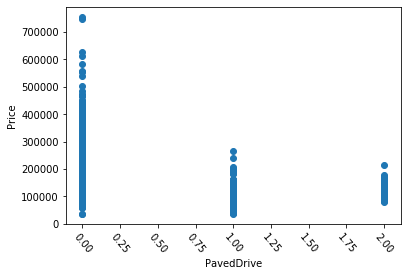

In [70]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  WoodDeckSF
Unique values in train:  [  0 298 192  40 255 235  90 147 140 160  48 240 171 100 406 222 288  49
 203 113 392 145 196 168 112 106 857 115 120  12 576 301 144 300  74 127
 232 158 352 182 180 166 224  80 367  53 188 105  24  98 276 200 409 239
 400 476 178 574 237 210 441 116 280 104  87 132 238 149 355  60 139 108
 351 209 216 248 143 365 370  58 197 263 123 138 333 250 292  95 262  81
 289 124 172 110 208 468 256 302 190 340 233 184 201 142 122 155 670 135
 495 536 306  64 364 353  66 159 146 296 125  44 215 264  88  89  96 414
 519 206 141 260 324 156 220  38 261 126  85 466 270  78 169 320 268  72
 349  42  35 326 382 161 179 103 253 148 335 176 390 328 312 185 269 195
  57 236 517 304 198 426  28 316 322 307 257 219 416 344 380  68 114 327
 165 187 181  92 228 245 503 315 241 303 133 403  36  52 265 207 150 290
 486 278  70 418 234  26 342  97 272 121 243 511 154 164 173 384 202  56
 321  86 194 421 305 117 550 509 153 394 371  63 252 136 186 170 474 214
 1

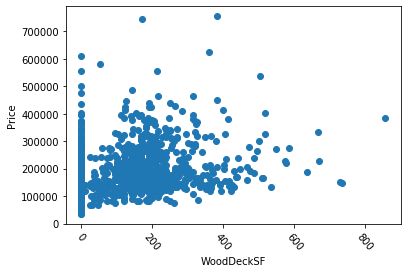

In [71]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
#  Numerical value with possible nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  OpenPorchSF
Unique values in train:  [ 61   0  42  35  84  30  57 204   4  21  33 213 112 102 154 159 110  90
  56  32  50 258  54  65  38  47  64  52 138 104  82  43 146  75  72  70
  49  11  36 151  29  94 101 199  99 234 162  63  68  46  45 122 184 120
  20  24 130 205 108  80  66  48  25  96 111 106  40 114   8 136 132  62
 228  60 238 260  27  74  16 198  26  83  34  55  22  98 172 119 208 105
 140 168  28  39 148  12  51 150 117 250  10  81  44 144 175 195 128  76
  17  59 214 121  53 231 134 192 123  78 187  85 133 176 113 137 125 523
 100 285  88 406 155  73 182 502 274 158 142 243 235 312 124 267 265  87
 288  23 152 341 116 160 174 247 291  18 170 156 166 129 418 240  77 364
 188 207  67  69 131 191  41 118 252 189 282 135  95 224 169 319  58  93
 244 185 200  92 180 263 304 229 103 211 287 292 241 547  91  86 262 210
 141  15 126 236] 
Unique values in test:  [  0  36  34  82  84  21  75  68  30 133  35  74 119 150 130  49  23 116
  48 172 136 102  50 111 166  3

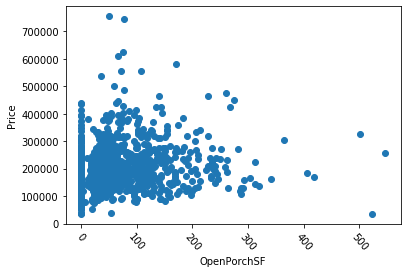

In [72]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with possible nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  EnclosedPorch
Unique values in train:  [  0 272 228 205 176  87 172 102  37 144  64 114 202 128 156  44  77 192
 140 180 183  39 184  40 552  30 126  96  60 150 120 112 252  52 224 234
 244 268 137  24 108 294 177 218 242  91 160 130 169 105  34 248 236  32
  80 115 291 116 158 210  36 200  84 148 136 240  54 100 189 293 164 216
 239  67  90  56 129  98 143  70 386 154 185 134 196 264 275 230 254  68
 194 318  48  94 138 226 174  19 170 220 214 280 190 330 208 145 259  81
  42 123 162 286 168  20 301 198 221 212  50  99] 
Unique values in test:  [   0   80  186  120  150  205  113  135  126  334  246   18   60   41
  128   35   48   32  364  112  248  168   45  239   52   56   36   86
  265   64  280  222  209  218   84  264  260  203  140  100  134  432
  156   42   40  169  176  148  244   25   81  160  238   94   98   51
   34  105  213  102  288   24   90  144  211   55  180   57   78   72
  368  154  165   92   16  192   66   96  109  236   30  139  219  101
  117  20

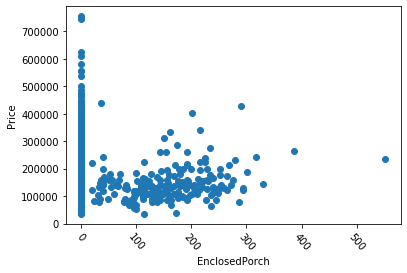

In [73]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with possible nan. Let's just fill nan with train mean.
test[columns[i]] = test[columns[i]].fillna(train[columns[i]].mean())
train[columns[i]] = train[columns[i]].fillna(train[columns[i]].mean())
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  3SsnPorch
Unique values in train:  [  0 320 407 130 180 168 140 508 238 245 196 144 182 162  23 216  96 153
 290 304] 
Unique values in test:  [  0 224 255 225 360 150 153 174 120 219 176  86 323]


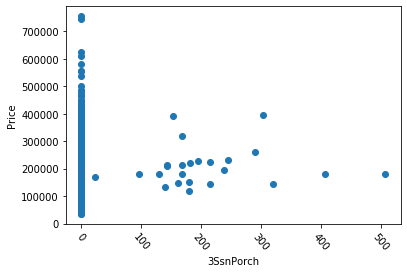

In [74]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with no nan.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  ScreenPorch
Unique values in train:  [  0 176 198 291 252  99 184 168 130 142 192 410 224 266 170 154 153 144
 128 259 160 271 234 374 185 182  90 396 140 276 180 161 145 200 122  95
 120  60 126 189 260 147 385 287 156 100 216 210 197 204 225 152 175 312
 222 265 322 190 233  63  53 143 273 288 263  80 163 116 480 178 440 155
 220 119 165  40] 
Unique values in test:  [120   0 144 256 216 204 160 240 148 168 266 166 200 155 108 490 156 196
 121  92 288 342 255 111 112 231 182 140 110 117 195 115 141 208 192  94
 164  95  64 576 227 161 100 221 171 135 322 174 175 180 217 201 109 165
 225 150  84 126 116 153 228 145 138  88 280 123 210 224 264 270 142 162
 348 113 104]


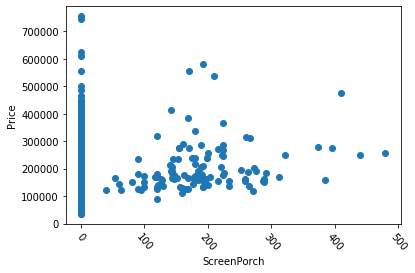

In [75]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with no nan.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  PoolArea
Unique values in train:  [  0 512 648 576 555 480 519 738] 
Unique values in test:  [  0 144 368 444 228 561 800]


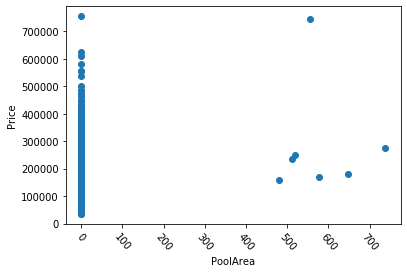

In [76]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with no nan.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next columnn

Looking at:  PoolQC
Unique values in train:  [nan 'Ex' 'Fa' 'Gd'] 
Unique values in test:  [nan 'Ex' 'Gd']


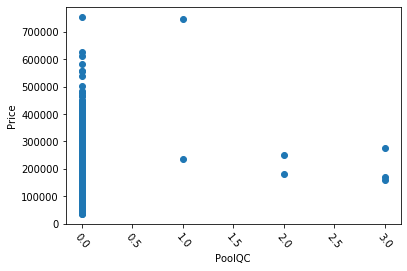

In [77]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  Fence
Unique values in train:  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 
Unique values in test:  ['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']


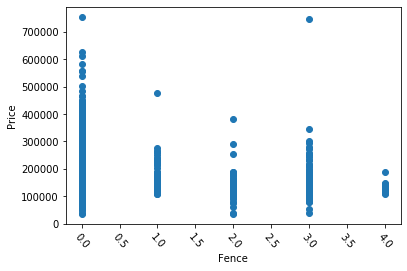

In [78]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  MiscFeature
Unique values in train:  [nan 'Shed' 'Gar2' 'Othr' 'TenC'] 
Unique values in test:  [nan 'Gar2' 'Shed' 'Othr']


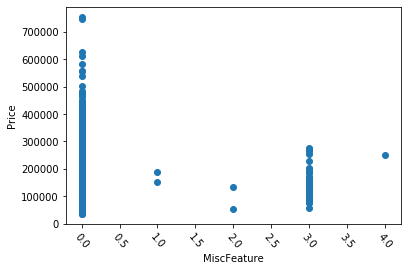

In [79]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans.
test[columns[i]] = test[columns[i]].fillna('0')
train[columns[i]] = train[columns[i]].fillna('0')
keys = sorted(train[columns[i]].unique())[1:]
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  MiscVal
Unique values in train:  [    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500] 
Unique values in test:  [    0 12500   500  1500   300   450    80   600   490  1200   650   400
   900  2500   700   750  2000  6500  1000  4500  3000 17000  1512   455
   460   420]


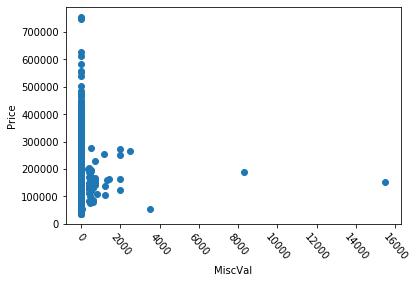

In [80]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with no nan.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# Normalization to log1p
train[columns[i]] = np.log1p(train[columns[i]])
test[columns[i]] = np.log1p(test[columns[i]])
i += 1 # go to next column

Looking at:  MoSold
Unique values in train:  [ 2  5  9 12 10  8 11  4  1  7  3  6] 
Unique values in test:  [ 6  3  1  4  5  2  7 10  8 11  9 12]


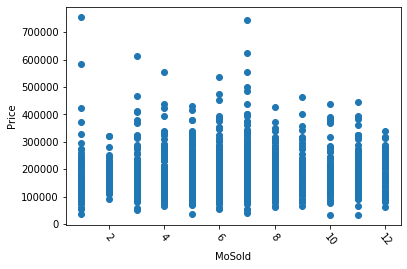

In [81]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with no nan.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  YrSold
Unique values in train:  [2008 2007 2006 2009 2010] 
Unique values in test:  [2010 2009 2008 2007 2006]


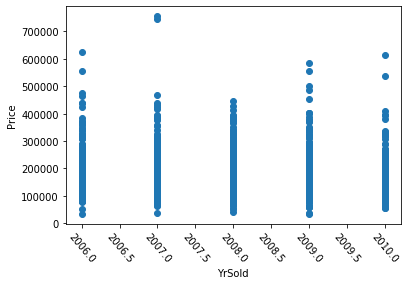

In [82]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Numerical value with no nan.
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  SaleType
Unique values in train:  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth'] 
Unique values in test:  ['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]


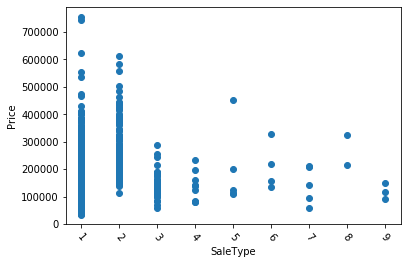

In [83]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with nans. Test contains nan (fill it with 0).
test[columns[i]] = test[columns[i]].fillna('0')
keys = train[columns[i]].unique()
values = [i + 1 for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x] if x in category.keys() else 0)
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Looking at:  SaleCondition
Unique values in train:  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family'] 
Unique values in test:  ['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']


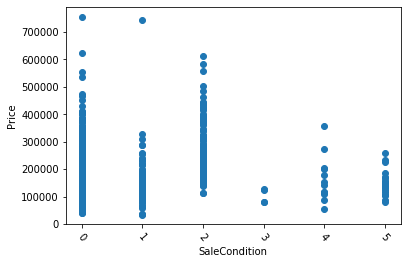

In [84]:
print('Looking at: ', columns[i]) # print which column is worked on
print('Unique values in train: ', train[columns[i]].unique(), '\nUnique values in test: ', test[columns[i]].unique())
# Categorical data with no nans.
keys = train[columns[i]].unique()
values = [i for i in range(len(keys))]
category = dict(zip(keys, values))
# fill column values
test[columns[i]] = test[columns[i]].apply(lambda x: category[x])
train[columns[i]] = train[columns[i]].apply(lambda x: category[x])
# plot values
plt.scatter(train[columns[i]], train['SalePrice'])
plt.xlabel(str(columns[i]))
plt.ylabel('Price')
degrees = -50
plt.xticks(rotation=degrees)
plt.show()
# min max normalization (bevause this basically could be category)
max_val = max(max(train[columns[i]]), max(test[columns[i]]))
min_val = min(min(train[columns[i]]), min(test[columns[i]]))
train[columns[i]] = (train[columns[i]] - min_val)/(max_val - min_val)
test[columns[i]] = (test[columns[i]] - min_val)/(max_val - min_val)
i += 1 # go to next column

Let's look at data correlation.

In [85]:
cor = train.corr()
cor.style.background_gradient(cmap='coolwarm')

## Part 2
Here, linear regressions will be built. <br>
Firsst, crossvalidation for feature search function and simple crossvalidation functions are written. RMSE is used for evaluation.

In [86]:
def my_cross_val_for_feat_search(model, features, data, n=5): # function for 1 feature
    kf = KFold(n_splits=n) # number of splits
    kf.get_n_splits(data) # splotting
    rmse_list = [] # RMSE list
    for i, (train_index, test_index) in enumerate(kf.split(train)): # training on n-1 parts and testing
        X_train, X_test = train.loc[train_index, features].values.reshape(-1, 1), train.loc[test_index, features].values.reshape(-1, 1)
        y_train, y_test = train.loc[train_index, 'SalePrice'], train.loc[test_index, 'SalePrice']
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(predict,y_test))
        rmse_list.append(rmse)
    return np.mean(rmse_list), np.std(rmse_list) # returning metrics

In [87]:
def my_cross_val(model, features, data, n=5): # functions for multiple features
    kf = KFold(n_splits=n) # number of splits
    kf.get_n_splits(data) # splotting
    rmse_list = [] # RMSE list
    for i, (train_index, test_index) in enumerate(kf.split(train)): # training on n-1 parts and testing
        X_train, X_test = train.loc[train_index, features], train.loc[test_index, features]
        y_train, y_test = train.loc[train_index, 'SalePrice'], train.loc[test_index, 'SalePrice']
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(predict,y_test))
        rmse_list.append(rmse)
    return np.mean(rmse_list), np.std(rmse_list), model

Next, let's write a uniform function for model-parameters combination testing ( feature selection of top-10 performing features, CV split selection, hyperparameter tuning).

In [88]:
def model_iteration(model_list, param_list):
    pr_list = [] # list for all predictions
    for i in range(len(model_list)):
        # searching for optimal features for the model
        features = train.columns[:len(train.columns) - 1]
        model = model_list[i]
        mean_list = []
        std_list = []
        for f in features:
            mean, std = my_cross_val_for_feat_search(model, f, train)
            mean_list.append(mean)
            std_list.append(std)
        feature_df = pd.DataFrame(features, columns=['name'])
        feature_df['mean'] = mean_list
        feature_df['std'] = std_list
        feature_df = feature_df.sort_values(['mean', 'std']) # sorting first on mean than on std
        features = feature_df['name'].values[:10] # getting top-10 performing features
        print (features)
        mean_list = []
        std_list = []
        # searching optimal CV split from 5 to 20
        for j in range(5, 11):
            mean, std, tmp = my_cross_val(model, features, train, j)
            mean_list.append(mean)
            std_list.append(std)
        cv_df = pd.DataFrame([i for i in range(5, 11)], columns=['k'])
        cv_df['mean'] = mean_list
        cv_df['std'] = std_list
        cv_df = cv_df.sort_values(['mean', 'std']) # sorting first on mean than on std
        k = cv_df['k'].values[0] # getting the highest performing split number
        print(k)
        model = model_list[i]
        parameters = param_list[i] # hyperparameters to search through dict
        grid = GridSearchCV(model, parameters, n_jobs=15, scoring='neg_mean_squared_error', cv=k, verbose=5) #searching through all possible hypreparemeter combinations with 10-fold cross-validation and choosing the combination with best auc score
        grid.fit(train[features], train['SalePrice'])
        model = grid.best_estimator_
        mean, std, model = my_cross_val(model, features, train, k)
        print(model, mean, std)
        prediction = model.predict(test[features])
        pr_list.append(prediction)
        sample_submission['SalePrice'] = prediction
        name = 'submission' + str(i) + '.csv'
        sample_submission.to_csv(name, index = None)
    return pr_list

Next, let's create list of models we will use and for each model create a dict of values for hyperparameter tuning.

In [89]:
model_list = [SGDRegressor(), LinearRegression(), Ridge(), Lasso(), ElasticNet()]
param_list = [{
    "loss" : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    "penalty"        : [ 'l2', 'l1', 'elasticnet'],
    "max_iter" : [ 100, 500, 1000, 1500, 2000, 2500],
    "alpha" : [0.00001, 0.0001, 0.001, 0.01, 0.1],
    "fit_intercept" : [True, False],
    "tol" : [None, 1e-3],
    "learning_rate" : ['constant', 'optimal', 'invscaling', 'adaptive']
        }, {
    "fit_intercept" : [True, False]
}, {
    "alpha" : [0.00001, 0.0001, 0.001, 0.01, 0.1],
    "fit_intercept" : [True, False],
    "max_iter" : [ 100, 500, 1000, 1500, 2000, 2500],
    "solver" : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}, {
    "alpha" : [0.00001, 0.0001, 0.001, 0.01, 0.1],
    "fit_intercept" : [True, False],
    "max_iter" : [ 100, 500, 1000, 1500, 2000, 2500],  
    "selection" : ['cyclic', 'random']
}, {
    "alpha" : [0.00001, 0.0001, 0.001, 0.01, 0.1],
    "l1_ratio": [0, 0.25, 0.5, 0.75, 1],
    "fit_intercept" : [True, False],
    "max_iter" : [ 100, 500, 1000, 1500, 2000, 2500],  
    "selection" : ['cyclic', 'random']
}]

In [90]:
predictions = model_iteration(model_list, param_list)

['OverallQual' 'GarageCars' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd' 'Fireplaces' 'GarageYrBlt' 'BsmtQual' 'HeatingQC']
10
Fitting 10 folds for each of 5760 candidates, totalling 57600 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed:    4.1s
[Parallel(n_jobs=15)]: Done 258 tasks      | elapsed:    6.2s
[Parallel(n_jobs=15)]: Done 420 tasks      | elapsed:    9.4s
[Parallel(n_jobs=15)]: Done 738 tasks      | elapsed:   20.2s
[Parallel(n_jobs=15)]: Done 972 tasks      | elapsed:   25.6s
[Parallel(n_jobs=15)]: Done 1398 tasks      | elapsed:   36.4s
[Parallel(n_jobs=15)]: Done 1758 tasks      | elapsed:   43.4s
[Parallel(n_jobs=15)]: Done 2205 tasks      | elapsed:   57.8s
[Parallel(n_jobs=15)]: Done 2583 tasks      | elapsed:  1.1min
[Parallel(n_jobs=15)]: Done 3024 tasks      | elapsed:  1.3min
[Parallel(n_jobs=15)]: Done 3567 tasks      | elapsed:  1.6min
[Parallel(n_jobs=15)]: Done 4053 tasks      | elapsed:  1.9min
[Parallel(n_jobs=15)]: Done 4575 tasks      | elapsed:  2.1min
[Parallel(n_jobs=15)]: Done 5133 tasks      | e

SGDRegressor(alpha=0.1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=False, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=2000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False) 40803.67031001853 6763.747065060714
['OverallQual' 'GrLivArea' 'GarageCars' '1stFlrSF' 'FullBath'
 'TotRmsAbvGrd' 'YearBuilt' 'YearRemodAdd' 'GarageYrBlt' 'Fireplaces']
10
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   6 out of  20 | elapsed:    2.1s remaining:    5.0s
[Parallel(n_jobs=15)]: Done  11 out of  20 | elapsed:    2.6s remaining:    2.1s
[Parallel(n_jobs=15)]: Done  16 out of  20 | elapsed:    2.8s remaining:    0.7s
[Parallel(n_jobs=15)]: Done  20 out of  20 | elapsed:    3.0s finished


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 38802.974057827145 7148.773346396814
['OverallQual' 'GrLivArea' 'GarageCars' '1stFlrSF' 'FullBath'
 'TotRmsAbvGrd' 'YearBuilt' 'YearRemodAdd' 'Fireplaces' 'GarageYrBlt']
10
Fitting 10 folds for each of 420 candidates, totalling 4200 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed:    3.1s
[Parallel(n_jobs=15)]: Done 819 tasks      | elapsed:    4.5s
[Parallel(n_jobs=15)]: Done 2115 tasks      | elapsed:    6.6s
[Parallel(n_jobs=15)]: Done 3699 tasks      | elapsed:    9.5s
[Parallel(n_jobs=15)]: Done 4200 out of 4200 | elapsed:   10.5s finished


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1500,
      normalize=False, random_state=None, solver='sag', tol=0.001) 38797.736539927246 7152.499317960521
['OverallQual' 'GrLivArea' 'GarageCars' '1stFlrSF' 'FullBath'
 'TotRmsAbvGrd' 'YearBuilt' 'YearRemodAdd' 'GarageYrBlt' 'Fireplaces']
10
Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=15)]: Done 159 tasks      | elapsed:    3.3s
[Parallel(n_jobs=15)]: Done 657 tasks      | elapsed:    4.8s
[Parallel(n_jobs=15)]: Done 1171 out of 1200 | elapsed:    6.3s remaining:    0.2s
[Parallel(n_jobs=15)]: Done 1200 out of 1200 | elapsed:    6.5s finished


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='random', tol=0.0001, warm_start=False) 38802.997869944986 7148.615929805674
['OpenPorchSF' 'MasVnrArea' 'GrLivArea' 'GarageArea' '1stFlrSF'
 'WoodDeckSF' 'TotalBsmtSF' 'YearRemodAdd' 'LotArea' 'FireplaceQu']
10
Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=15)]: Done 132 tasks      | elapsed:    3.5s
[Parallel(n_jobs=15)]: Done 714 tasks      | elapsed:    5.0s
[Parallel(n_jobs=15)]: Done 2010 tasks      | elapsed:    8.7s
[Parallel(n_jobs=15)]: Done 3594 tasks      | elapsed:   14.1s
[Parallel(n_jobs=15)]: Done 5466 tasks      | elapsed:   18.9s
[Parallel(n_jobs=15)]: Done 6000 out of 6000 | elapsed:   20.9s finished
/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1495135986036.7417, tolerance: 920791133.4609975
  positive)
/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139806

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=100, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 44845.18914347109 7664.322734233954


Let's create one more prediction which equals average for prediction of each model.

In [93]:
final_pr = np.mean(predictions, axis=0)
sample_submission['SalePrice'] = final_pr
sample_submission.to_csv('avg_subm.csv', index = None)

Mean works even worse - 0.83343

## Part 3
In this part, let's visualize dependence of kaggle score from mean and std of scores here.

In [97]:
std_list = [6763.747065060714, 7148.773346396814, 7152.499317960521, 7148.615929805674, 7664.3227342339]
mean_list = [40803.67031001853, 38802.974057827145, 38797.736539927246, 38802.997869944986, 44845.18914347109]
kaggle_list = [0.26705, 0.88252, 0.88139, 0.88251, 0.81057]

Text(0, 0.5, 'Kaggle score')

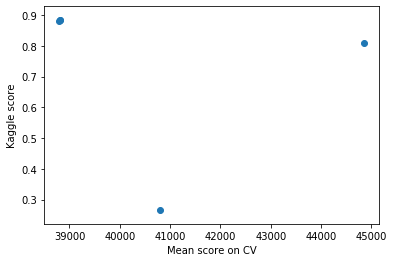

In [98]:
plt.scatter(mean_list, kaggle_list) # plotting score on kaggle from mean 
plt.xlabel('Mean score on CV')
plt.ylabel('Kaggle score')

Text(0, 0.5, 'Kaggle score')

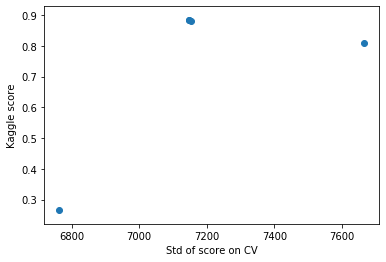

In [99]:
plt.scatter(std_list, kaggle_list) # plotting score from std
plt.xlabel('Std of score on CV')
plt.ylabel('Kaggle score')

## Summary
I think that the main problem of bad scores is that values in test (categorical) are not in train. Plus, every fitting, scores are different and range from 0.3 to 0.8.<br>
For every model, optimal features were chosen on CV performance, as well as parameters for model and CV number of splits. <br>
Probably, the main problem is normalization.